![](http://www.excelenciasgourmet.com/sites/default/files/styles/slideshow_large/public/2017-12/vinos_0.jpg?itok=id8HxL6E)

## Introduction


**
Hello kagglers!  Here is my first project. ** 


* **In this data, I classified wine qualities into 3 categories as good, mid and bad.  Then, I explored the new data with data visualization libraries.** 

* **For prediction I used K-Nearest Neighbors, Support Vector Machine and Random Forest models.** 

* **For conclusion, I matched accuracy scores according to model prediction ratios**


> **Please leave me a comment and upvote the kernel if you liked at the end.**

**Basic Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get The Data**

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


**Classify The Quality**

In [3]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [4]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

In [5]:
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid


## Exploratory Data Analysis

**Let's explore the data!**

___
**Here I counted the number of each class and checked correlation of the columns**

Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

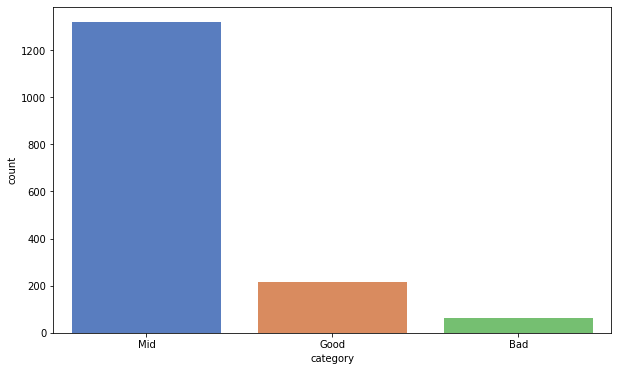

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

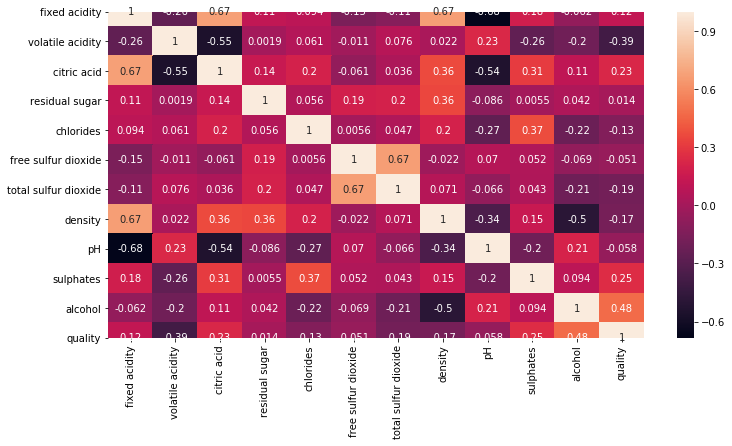

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

**According to heatmap, we can focus on alcohol-quality and density-alcohol relations to get meaningful exploration**

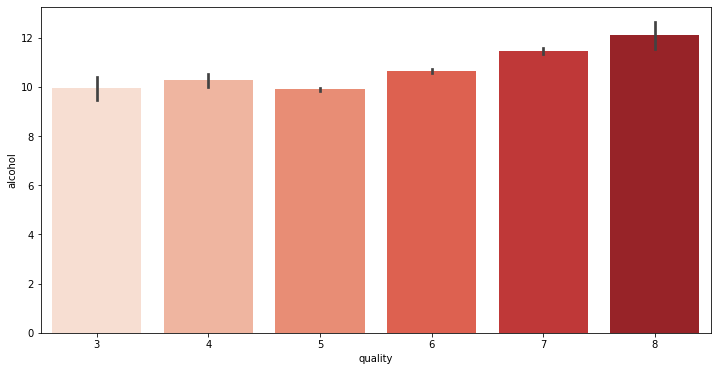

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Reds")

<Figure size 864x432 with 0 Axes>

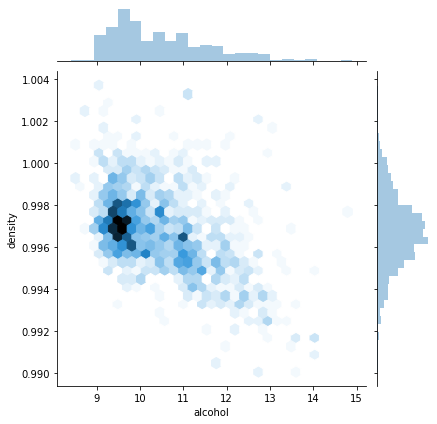

In [9]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex")

** Setting features, labels and
Encoding the categorical data**

**[](http://)(good=1, med=2, bad=3)**

In [10]:
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y =LabelEncoder()
y= labelencoder_y.fit_transform(y)

## Training and Testing Data
**Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

**Scaling the data for optimise predictions**

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Training the Model and Predicting the Test Data 

Now its time to train our models on our training data and predict each of them!

## Support Vector Machine

In [14]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      0.30      0.41        30
           2       0.89      0.98      0.93       277

    accuracy                           0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.68      0.57      0.62        30
           2       0.91      0.97      0.94       277

    accuracy                           0.89       320
   macro avg       0.53      0.51      0.52       320
weighted avg       0.85      0.89      0.87       320



C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.55      0.57      0.56        30
           2       0.91      0.95      0.93       277

    accuracy                           0.88       320
   macro avg       0.49      0.51      0.50       320
weighted avg       0.84      0.88      0.86       320



C:\Users\Vignesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Conclusion

**Time to match the results!**

In [18]:
conclusion = pd.DataFrame({'models': ["SVC","Random Forest","KNN"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.878125
1,Random Forest,0.893750
2,KNN,0.875000


## CHEERS!

![](http://media-cdn.tripadvisor.com/media/photo-s/10/28/86/6f/wine-cheers.jpg)

**As a result, we can see Random Forest model has the best accurary ratio for predicting our wine quality!**

**On the other hand, we can evaluate the model. I will work on it as soon as possible too.**

**Thank you for your time and attention! Please leave me a comment and upvote the kernel if you liked.**

**Also I'm sorry for grammar mistakes.**